# Se da un fisier care contine un text (format din mai multe propozitii) in limba romana - a se vedea fisierul ”data/texts.txt”. Se cere sa se determine si sa se vizualizeze:

In [41]:
#import-uri
import nltk
import matplotlib.pyplot as plt
import numpy
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\redis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\redis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
#citirea textului din fisier
f = open('data/texts.txt','r',encoding='utf-8')
raw=f.read()
print(raw)

Mesaj de informare: 
Cursul și laboratoarele de Inteligență Artificială vor fi o 
provocare pentru toți. Suntem convinși că veți realiza proiecte 
foarte interesante. Vă încurajăm să adresați întrebări atunci 
când ceva nu e clar, atât în mod live, cât și folosind platforma 
Teams, canalul ”general”. 
Dacă ați citit până aici, vă rugăm să lăsați un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm că am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimați cursanți,
Suntem încântați să vă avem în echipa noastră pentru Cursul și 
laboratoarele de Inteligență Artificială. Această experiență va 
fi o adevărată provocare, dar suntem convinși că veți realiza 
proiecte extrem de interesante.
Vă încurajăm să fiți activi și să adresați întrebări atunci când 
ceva nu este clar. Fie că este vorba de o discuție în timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici să vă sprijinim.
Succes și să înceapă ave

## numarul de propozitii din text;

In [43]:
# Filter out non-word tokens
propozitii = nltk.sent_tokenize(raw)

print(len(propozitii))

10


## numarul de cuvinte din text

In [44]:
cuvinte =  nltk.RegexpTokenizer(r'\w+').tokenize(raw)
print(len(cuvinte))

160


## numarul de cuvinte diferite din text

In [45]:
cuvinte_diferite = nltk.FreqDist(cuvinte)
dict_cuvinte = dict(cuvinte_diferite)
print(len(dict_cuvinte.keys()))

97


## cel mai scurt si cel mai lung cuvant (cuvinte)

In [46]:
print(min(cuvinte,key=len))
print(max(cuvinte,key=len))

o
Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm


## textul fara diacritice

In [47]:
translate = {'ă':'a','â':'a','î':'i','ș':'s','ț':'t','Ă':'A','Â':'A','Î':'I','Ș':'S','Ț':'T'}
raw_copy = (raw + '.')[:-1] #copie la raw sa nu modific original textul

for char in translate:
        raw_copy = raw_copy.replace(char,translate[char])

print(raw_copy)

Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul ”general”. 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm ca am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici sa va sprijinim.
Succes si sa inceapa ave

## sinonimele celui mai lung cuvant din text

In [48]:
nltk.corpus.wordnet.synsets(max(cuvinte,key=len))

[]

# Problema 4 Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

## problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.

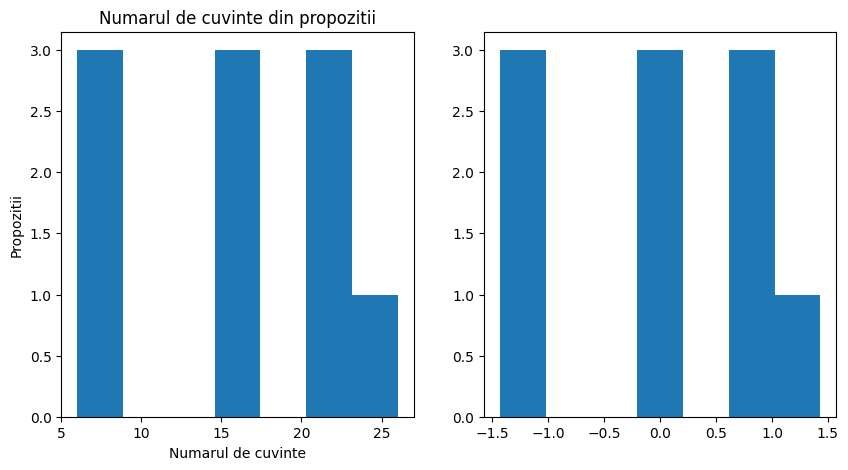

In [49]:
numere = []
for propozitie in propozitii:
    cuvinte_propozitie = nltk.RegexpTokenizer(r'\w+').tokenize(propozitie)
    numere.append(len(cuvinte_propozitie))

niu = numpy.mean(numere)
sigma = numpy.std(numere)

numereNormalizate = [ (x-niu)/sigma for x in numere]

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(numere, bins=len(set(numere)) )
ax[0].set_title('Numarul de cuvinte din propozitii')
ax[0].set_xlabel('Numarul de cuvinte')
ax[0].set_ylabel('Propozitii')

ax[1].hist(numereNormalizate, bins=len(set(numereNormalizate)) )

plt.show()